In [4]:
import xgboost as xgb
import matplotlib.pyplot as plt
from pylab import plot, show, subplot, specgram, imshow, savefig
import pandas as pd
import operator
import graphviz as gv
%matplotlib inline

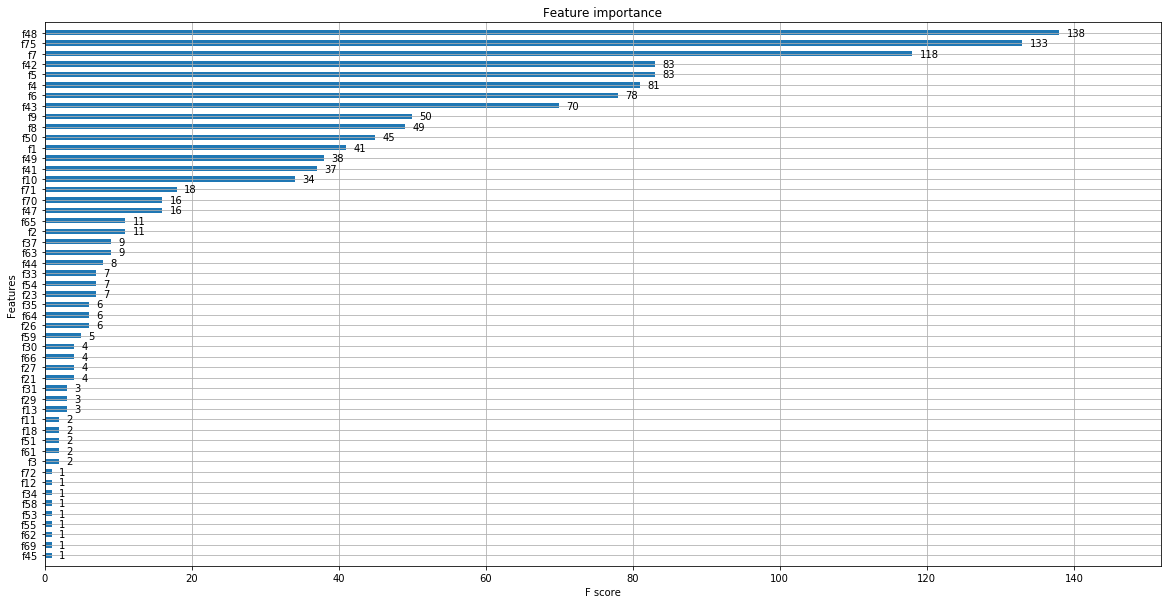

In [13]:
#load model
bst = xgb.Booster()
bst.load_model('testrand.model')
bst.dump_model('xgbrand_uni.dump', fmap='xgb_uni.fmap', with_stats=True)

#The feature importance of xgb
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(bst, height=0.5, ax=ax)

                                              feature  fscore
0                               Ben_Qi_Yu_Qi_Tian_Shu     138
1                                 Yu_Qi_Ben_Jin_(Yuan     133
2                     Li_Shi_Zui_Chang_Yu_Qi_Tian_Shu     118
3                               Yi_Huan_Ben_Jin_(Yuan      83
4                                     Sheng_Yu_Qi_Shu      83
5                                Sheng_Yu_Li_Xi_(Yuan      81
6                              Sheng_Yu_Ben_Jin_(Yuan      78
7                                           Nian_Ling      70
8                                           Dao_Qi_Ri      54
9                                       He_Tong_Li_Lu      50
10                                Li_Shi_Yu_Qi_Ci_Shu      49
11                    Mei_Qi_Chang_Huan_Ben_Jin_(Yuan      45
12                      Mei_Qi_Chang_Huan_Li_Xi_(Yuan      38
13                                Yi_Huan_Li_Xi_(Yuan      37
14                                          Qi_Shi_Ri      35
15      

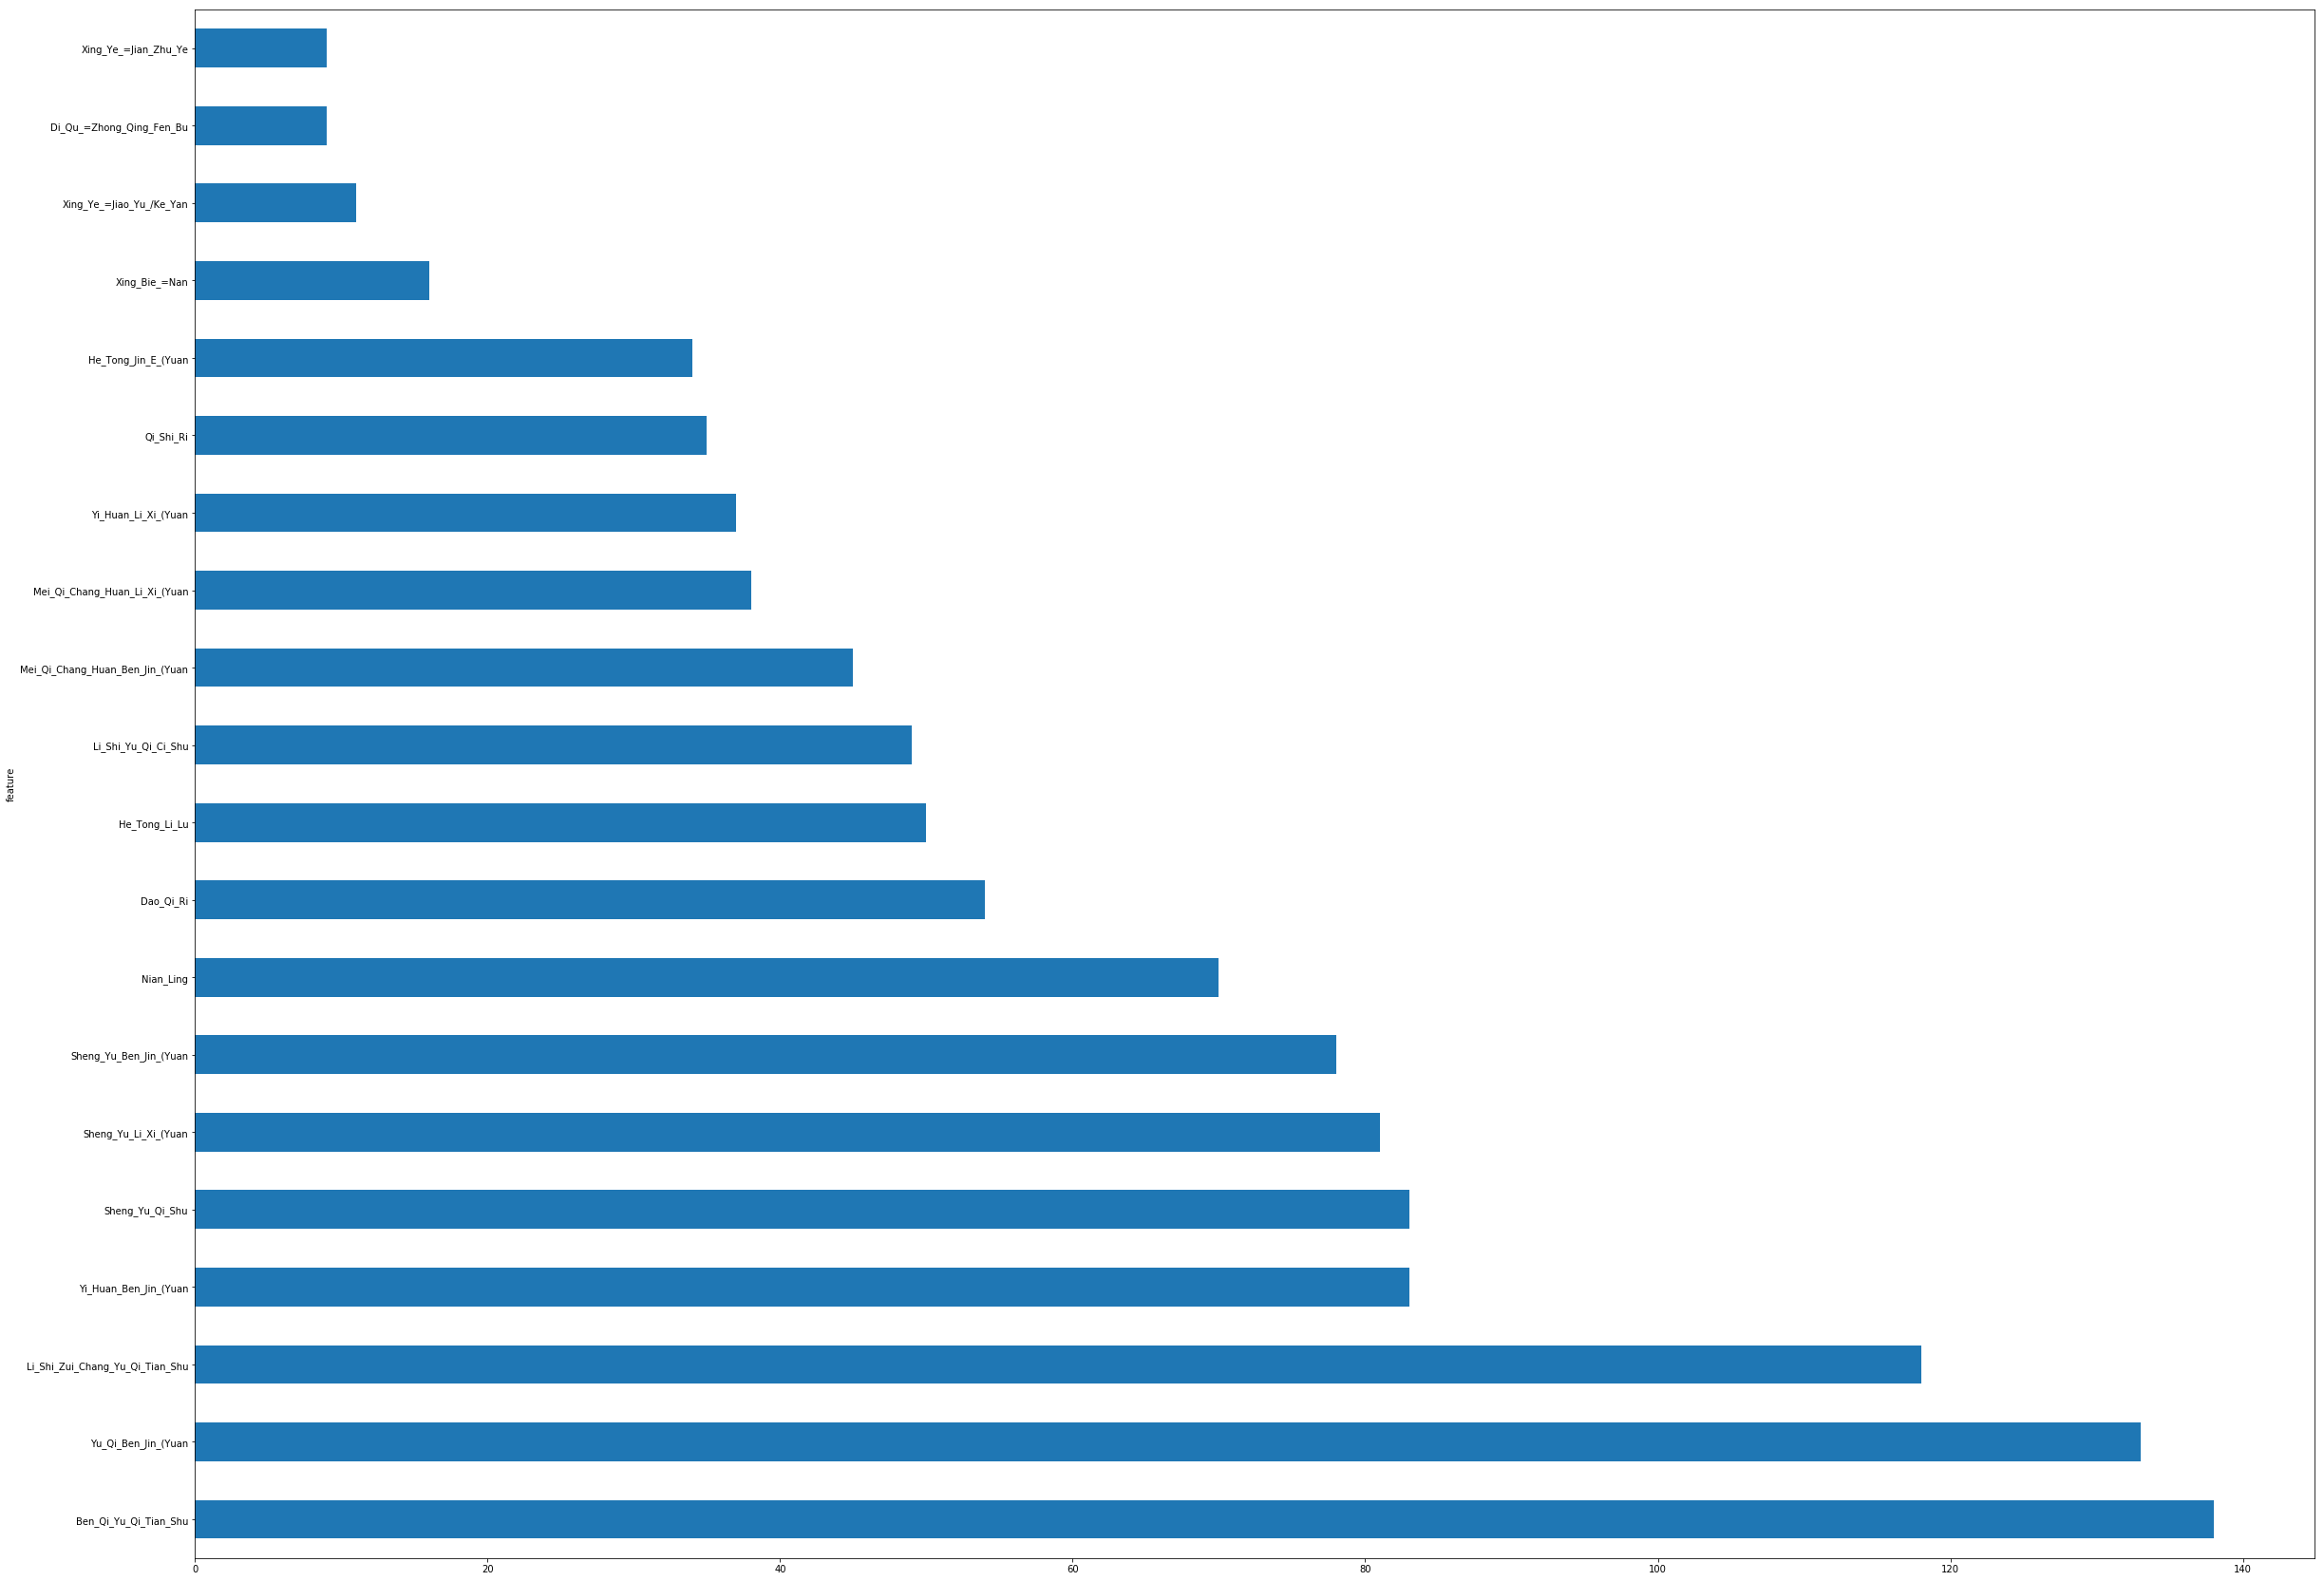

In [12]:
importance = bst.get_fscore(fmap='xgbrand_uni.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
#df['feature'] = df['feature'].map(lambda x : x.encode('u8'))
print df

plt.figure()
num_f = 20
df[:num_f].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(40, 30))
#plt.gcf().savefig('features_importance.png')

Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot eps fig gv imap imap_np ismap pic plain plain-ext pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4


CalledProcessError: Command '['dot', '-Tpng']' returned non-zero exit status 1

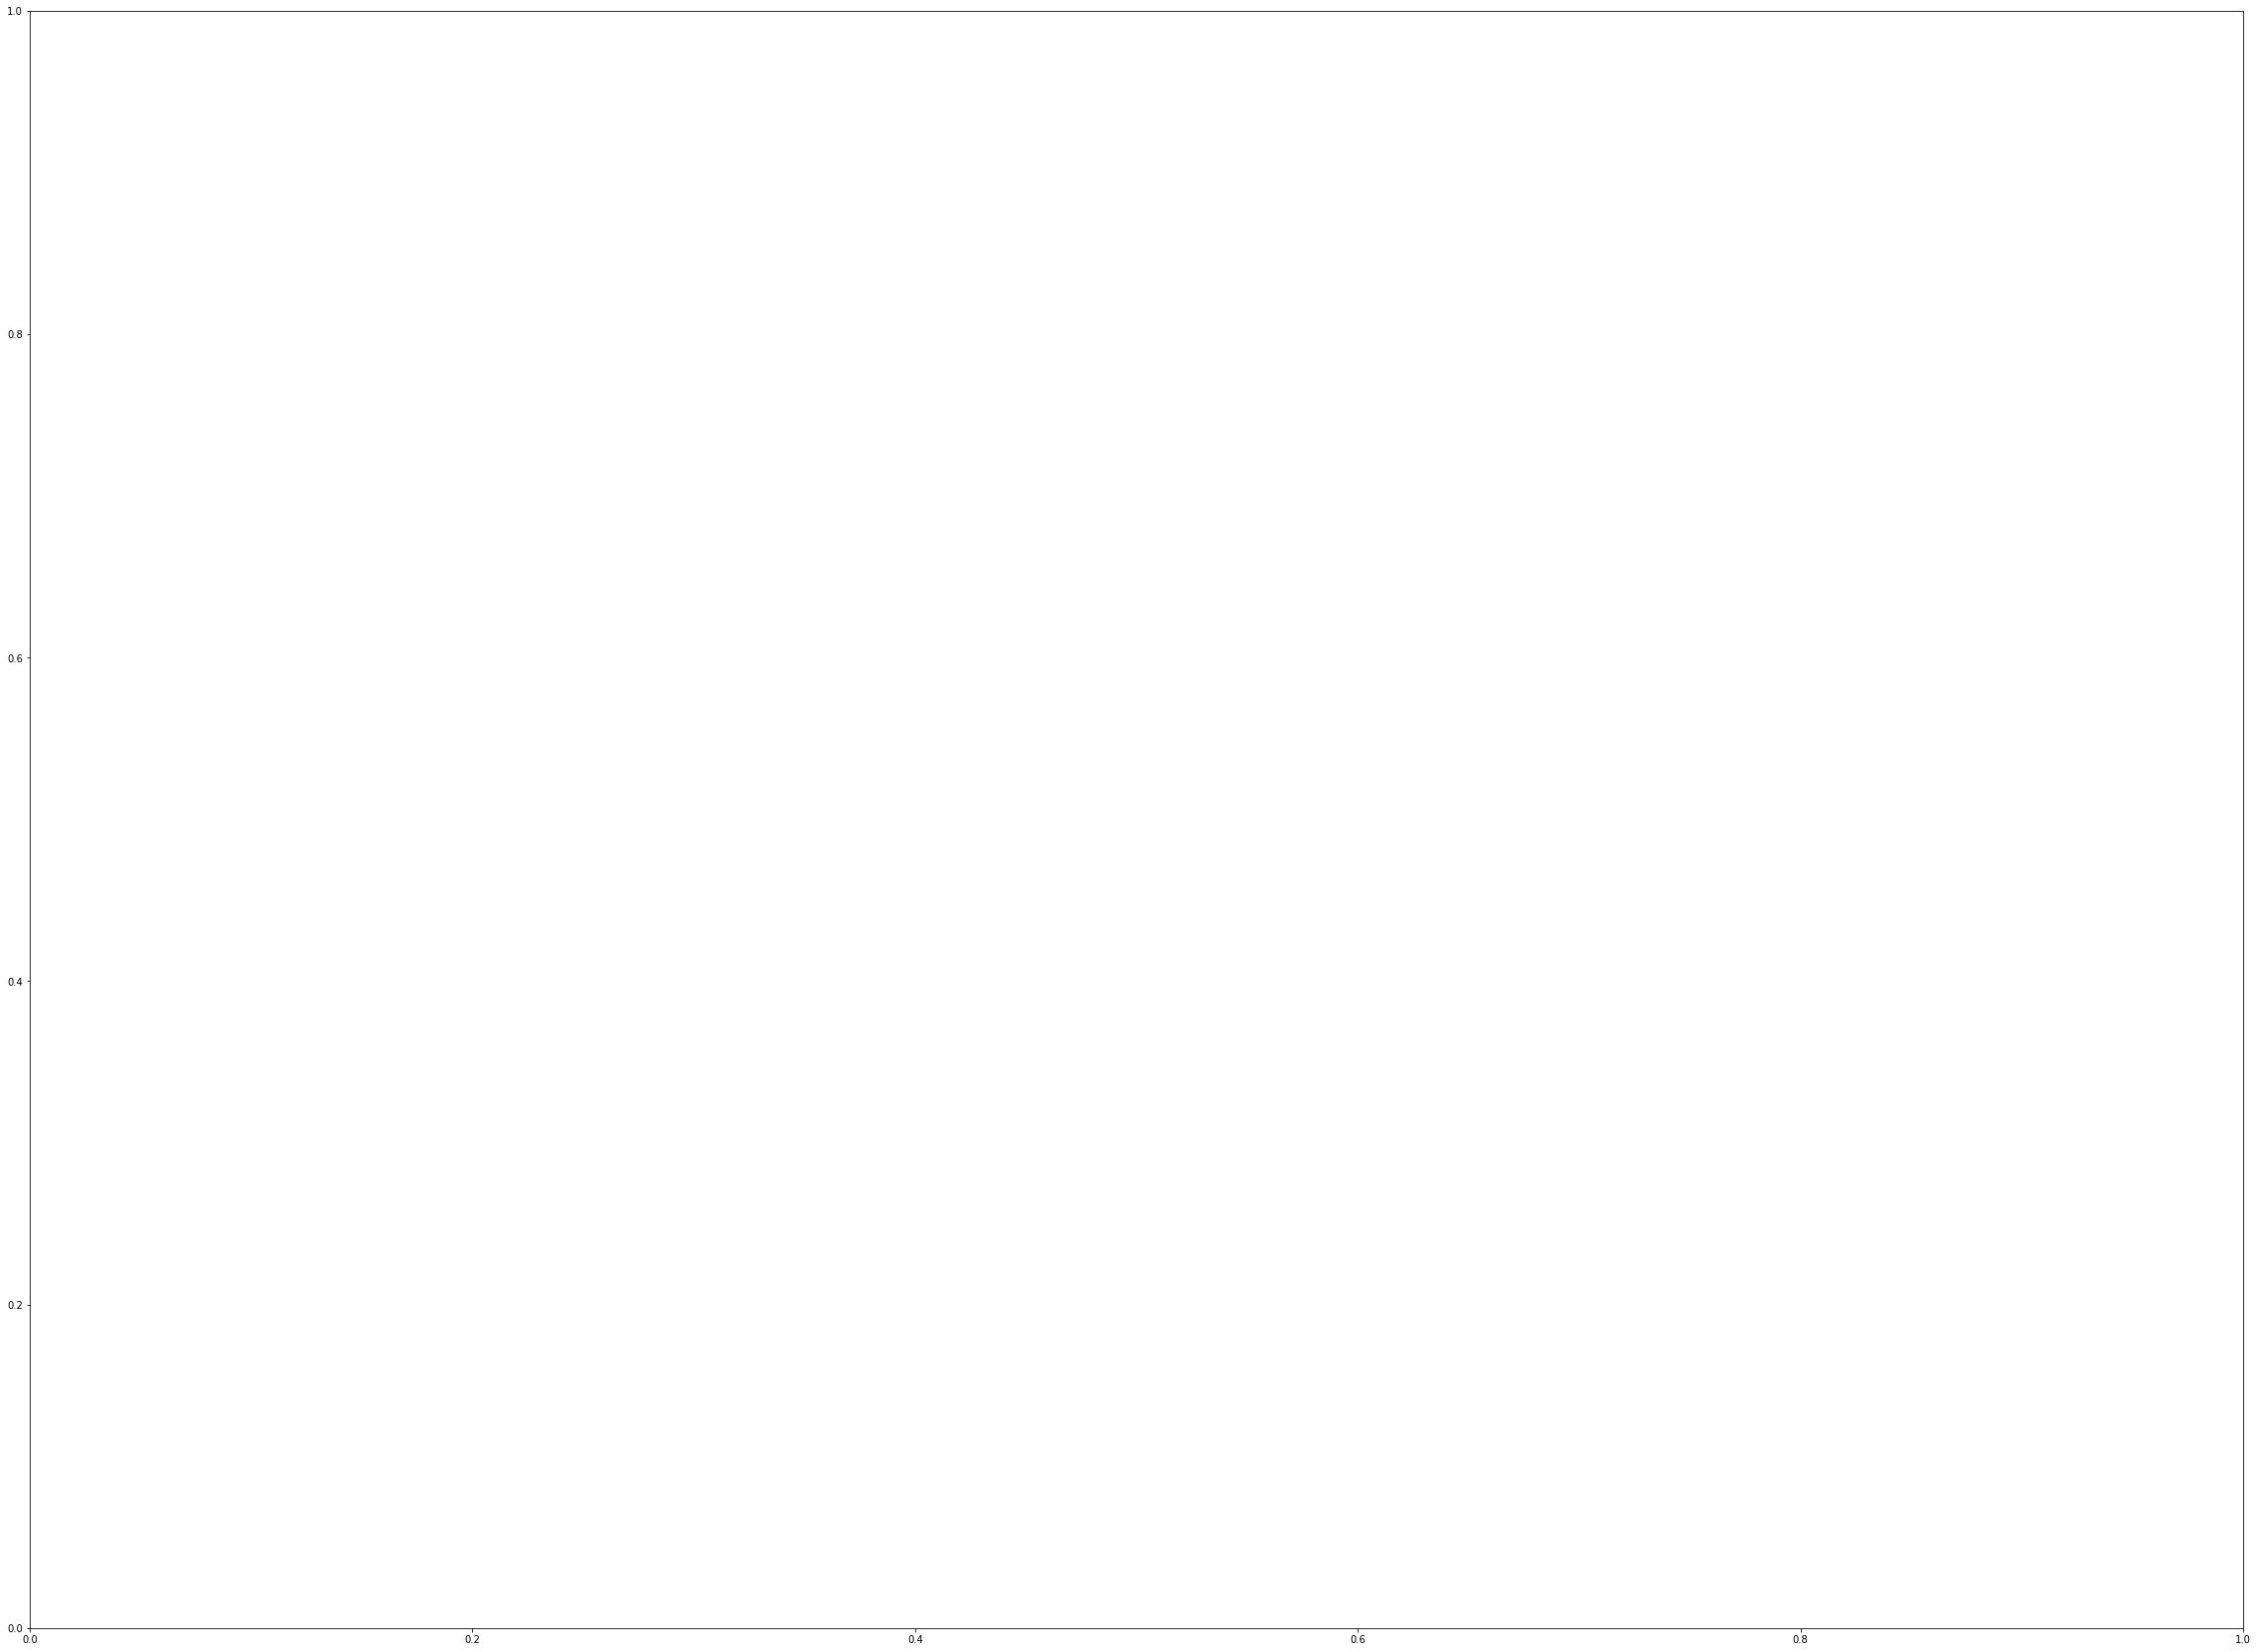

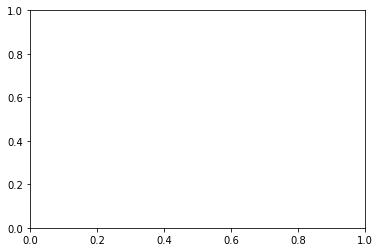

In [3]:
fig, ax = plt.subplots(figsize=(40, 30))
xgb.plot_tree(bst, fmap='xgb_uni.fmap')
#graph = xgb.to_graphviz(bst, fmap='xgb_uni.fmap', ax=ax)

In [ ]:
import graphviz

In [ ]:
def extract(x, n):
    l = x.split('|')
    for elm in l:
        v = elm.split(':')
        if int(v[0]) == n:
            return int(float(v[1]))
    #print n
    raise Exception('no such period')

num = 3
#f_list = [u'本期逾期天数']
#f_list = [u'历史逾期次数']
#f_list=[u'逾期本金（元）']
f_list = [u'历史最长逾期天数']
df = data[f_list]
#[(data[u'标注']==0) & (data[u'贷款期数（月）'] == num)][f_list][:100]
for f in f_list:
    for i in xrange(2, num):
        df.loc[:, str(i)+'th_'+f] = df[f].apply(extract, args=(i,))
df

In [ ]:
df[u'5th'].value_counts()

In [ ]:
data[u'贷款期数（月）'].value_counts()

In [ ]:
df[u'4th_本期逾期天数'].describe()

In [ ]:
data[u'还款间隔（月）'].value_counts()

In [ ]:
matplotlib.get_configdir()